In [1]:
# E3.ipynb

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# To ensure reproducibility
np.random.seed(42)

# Read data from Excel file
file_path = 'E3.xlsx'
train_data = pd.read_excel(file_path, sheet_name='train')
test_data = pd.read_excel(file_path, sheet_name='test')

In [3]:
# Separate features and target variable in train data
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']

# Separate features and target variable in test data
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

In [4]:
# Adding outliers (UNCOMMENT ONLY WHEN REQUIRED! SEE THE PROBLEM STATEMENTs ...)
X_train = np.array(list(X_train['x1']) + [X_train['x1'].mean() + x for x in np.random.randn(5)]).reshape(-1,1)
y_train = np.array(list(y_train) + [y_train.max() + 4 + x for x in np.random.randn(5)])

In [5]:
# Use PolynomialFeatures to create features
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


/Users/sagnikdey/Desktop/assignment e3/1/E3-24B2477/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [6]:
print(X_train_poly)

[[ 1.          7.61428571]
 [ 1.          7.62142857]
 [ 1.          7.62857143]
 ...
 [ 1.         10.77008166]
 [ 1.         11.64542297]
 [ 1.          9.88823974]]


In [7]:
print(X_train_poly)

[[ 1.          7.61428571]
 [ 1.          7.62142857]
 [ 1.          7.62857143]
 ...
 [ 1.         10.77008166]
 [ 1.         11.64542297]
 [ 1.          9.88823974]]


In [8]:
# standardization of the data
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [9]:
poly.get_feature_names_out()

array(['1', 'x0'], dtype=object)

In [10]:
####################################
# Save the augmented data set to a file for review

# Create dataframe with test data and additional features
# Get feature names
feature_names = poly.get_feature_names_out()
augmented_data = pd.DataFrame(X_train_poly, columns=feature_names)
augmented_data['y'] = train_data['y']

# # Write dataframe to CSV
augmented_data.to_csv('augmented_train_data.csv', index=False)
####################################
####################################
# Save the augmented data set to a file for review

# Create dataframe with test data and additional features
# Get feature names
feature_names = poly.get_feature_names_out()
augmented_data = pd.DataFrame(X_test_poly, columns=feature_names)
augmented_data['y'] = test_data['y']

# # Write dataframe to CSV
augmented_data.to_csv('augmented_test_data.csv', index=False)
####################################

In [11]:
# Algorithms
algorithms = {
    'Linear Regression': LinearRegression(),
    # 'Neural Network-1': MLPRegressor(hidden_layer_sizes=(10,), max_iter=20000),
    # 'Neural Network-2': MLPRegressor(hidden_layer_sizes=(10,64), max_iter=20000),
    # 'Neural Network-2 org': MLPRegressor(hidden_layer_sizes=(10,10), max_iter=20000),
    # 'Neural Network-3': MLPRegressor(hidden_layer_sizes=(10,10,10), max_iter=20000),
    # 'Neural Network-4': MLPRegressor(hidden_layer_sizes=(10,10,10,10), max_iter=20000),
    # 'Neural Network-5': MLPRegressor(hidden_layer_sizes=(10,10,10,10,10), max_iter=20000),
}

# Metric tables
metric_table_train = pd.DataFrame()
metric_table_test = pd.DataFrame()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

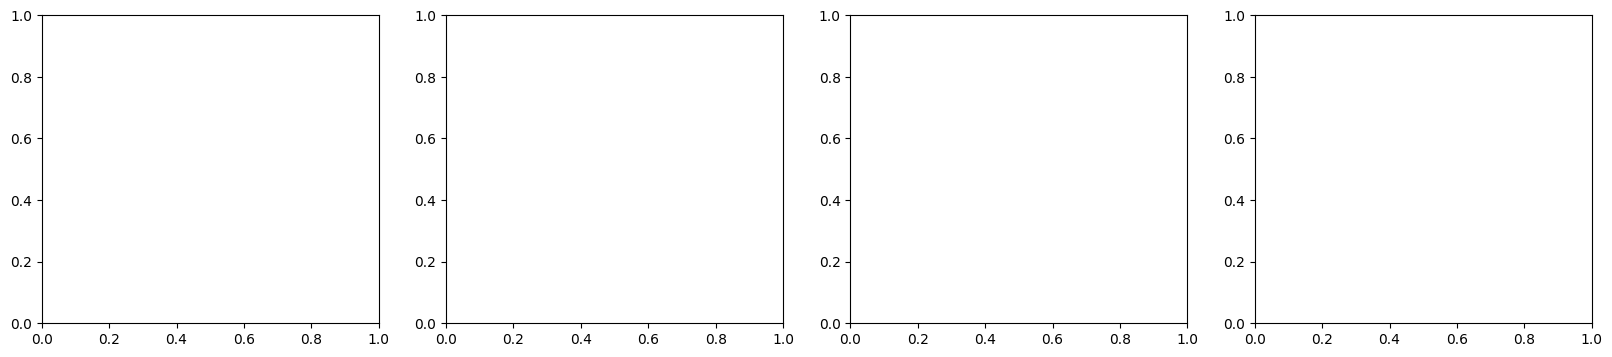

In [12]:
# Create a grid of subplots
fig, axs = plt.subplots(len(algorithms), 4, figsize=(20, 4 * len(algorithms)))
fig_row = -1

# Run the algorithms ... create metrics and plots
for algorithm_name, algorithm in algorithms.items():

    # Train model
    algorithm.fit(X_train_poly, y_train)

    # Train predictions
    y_train_pred = algorithm.predict(X_train_poly)

    # Test predictions
    y_test_pred = algorithm.predict(X_test_poly)

    # Train metrics
    r2_train = algorithm.score(X_train_poly, y_train)
    rmse_train = root_mean_squared_error(y_train, y_train_pred)

    # Test metrics
    r2_test = algorithm.score(X_test_poly, y_test)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    # Additional metrics using statsmodels for all algorithms
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred

    durbin_watson_stat_train = sm.stats.durbin_watson(residuals_train)
    jb_stat_train, jb_p_value_train, _, _ = sm.stats.jarque_bera(residuals_train)

    durbin_watson_stat_test = sm.stats.durbin_watson(residuals_test)
    jb_stat_test, jb_p_value_test, _, _ = sm.stats.jarque_bera(residuals_test)

    # Update metric tables
    metric_table_train.at[algorithm_name, 'R-squared'] = r2_train
    metric_table_train.at[algorithm_name, 'RMSE'] = rmse_train
    metric_table_train.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_train
    metric_table_train.at[algorithm_name, 'Jarque-Bera'] = jb_stat_train
    metric_table_train.at[algorithm_name, 'JB P-value'] = jb_p_value_train

    metric_table_test.at[algorithm_name, 'R-squared'] = r2_test
    metric_table_test.at[algorithm_name, 'RMSE'] = rmse_test
    metric_table_test.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_test
    metric_table_test.at[algorithm_name, 'Jarque-Bera'] = jb_stat_test
    metric_table_test.at[algorithm_name, 'JB P-value'] = jb_p_value_test

    # Create the plots
    fig_row = fig_row+1

    axs[fig_row, 0].scatter(X_train, y_train)
    axs[fig_row, 0].scatter(X_train, y_train_pred)
    axs[fig_row, 0].set_title(algorithm_name + " - Train")

    axs[fig_row, 1].scatter(X_train, residuals_train)
    axs[fig_row, 1].set_title(algorithm_name + " Residuals - Train")

    axs[fig_row, 2].scatter(X_test, y_test)
    axs[fig_row, 2].scatter(X_test, y_test_pred)
    axs[fig_row, 2].set_title(algorithm_name + " - Test")

    axs[fig_row, 3].scatter(X_test, residuals_test)
    axs[fig_row, 3].set_title(algorithm_name + " Residuals - Test")
############################

plt.tight_layout()
plt.show()

In [ ]:
# Display the metrics' Tables
print("Metrics - Train Data:\n")
print(metric_table_train.to_string())
print("-------------------------------------------------")

print("Metrics - Test Data:\n")
print(metric_table_test.to_string())

Metrics - Train Data:

                      R-squared      RMSE  Durbin-Watson    Jarque-Bera  JB P-value
Linear Regression      0.777607  1.692491       0.118037    2797.898657         0.0
Neural Network-1       0.912744  1.060137       0.388552  260552.993211         0.0
Neural Network-2       0.916693  1.035874       0.388310  280578.610169         0.0
Neural Network-2 org   0.915585  1.042736       0.396332  293916.029628         0.0
Neural Network-3       0.915626  1.042488       0.385554  278171.547050         0.0
Neural Network-4       0.916397  1.037710       0.395914  303413.540302         0.0
Neural Network-5       0.916938  1.034348       0.387578  284186.935472         0.0
-------------------------------------------------
Metrics - Test Data:

                      R-squared      RMSE  Durbin-Watson  Jarque-Bera  JB P-value
Linear Regression      0.817621  1.503643       0.078944    11.686624    0.002899
Neural Network-1       0.987273  0.397212       1.043023     1.784250